In [39]:
# For Data preparation and manipulation
import numpy as np 
import pandas as pd

# For visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
## Reading the dataset
loan_train = pd.read_csv(r"E:\Data Science\Assignments\Virtual Competition-2\train file.csv")
loan_test = pd.read_csv(r"E:\Data Science\Assignments\Virtual Competition-2\test file.csv")

In [41]:
loan_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [42]:
loan_train.shape # to check the shape of the train dataset(observation,features)

(614, 13)

In [43]:
loan_test.shape

(367, 12)

In [44]:
loan_train.info()
## to get column data type, number of features so on

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


## Exploratory Data Analysis

In [45]:
## to find the number of null values in each feature of Train dataframe

loan_train.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [46]:
loan_test.isna().sum()## null Values in Test dataframe

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [47]:
## defining function to get the value counts of feature
def object_type_count(df ,feature_name):
     if df[feature_name].dtype ==  'object':
        print(df[feature_name].value_counts())

In [48]:
object_type_count(loan_train, 'Gender')## number of unique 

Male      489
Female    112
Name: Gender, dtype: int64


In [49]:
for featurename in loan_train:
    if loan_train[featurename].dtype == 'object':
        print( "\n"+featurename+" Value count are :" )
        object_type_count(loan_train,featurename)


Loan_ID Value count are :
LP001002    1
LP002328    1
LP002305    1
LP002308    1
LP002314    1
           ..
LP001692    1
LP001693    1
LP001698    1
LP001699    1
LP002990    1
Name: Loan_ID, Length: 614, dtype: int64

Gender Value count are :
Male      489
Female    112
Name: Gender, dtype: int64

Married Value count are :
Yes    398
No     213
Name: Married, dtype: int64

Dependents Value count are :
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

Education Value count are :
Graduate        480
Not Graduate    134
Name: Education, dtype: int64

Self_Employed Value count are :
No     500
Yes     82
Name: Self_Employed, dtype: int64

Property_Area Value count are :
Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

Loan_Status Value count are :
Y    422
N    192
Name: Loan_Status, dtype: int64


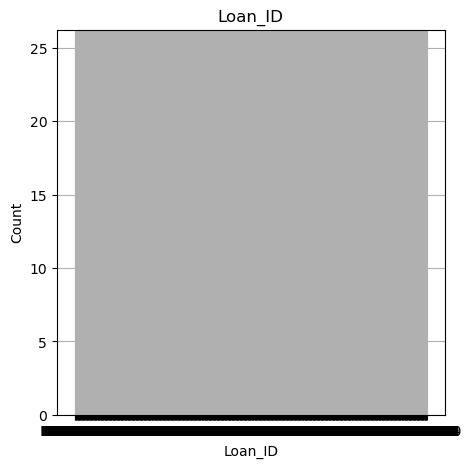

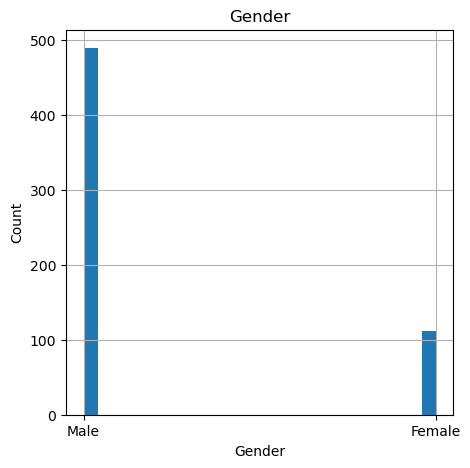

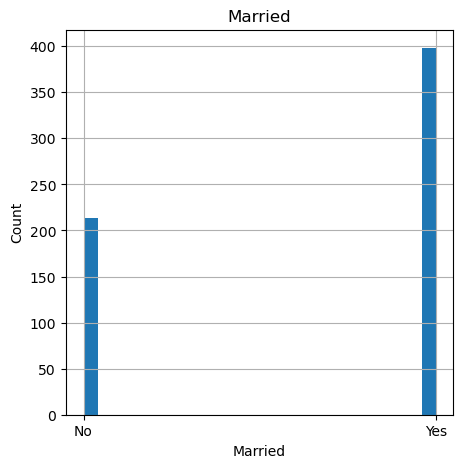

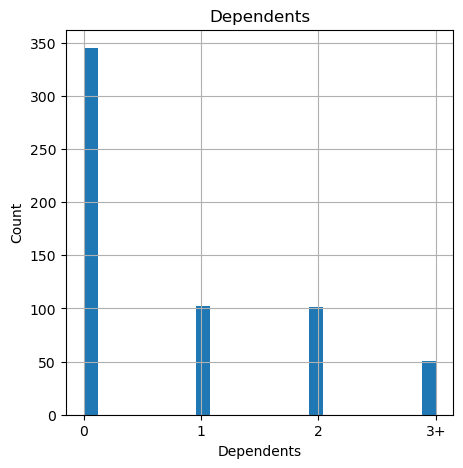

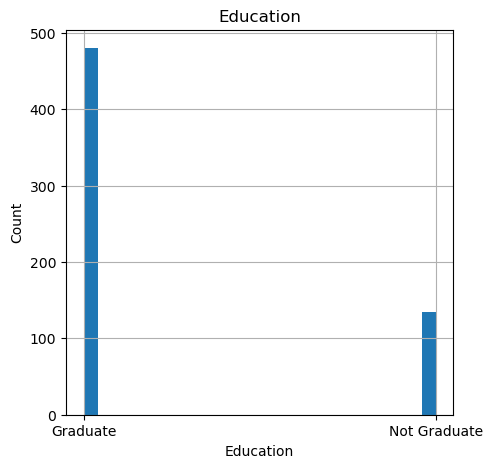

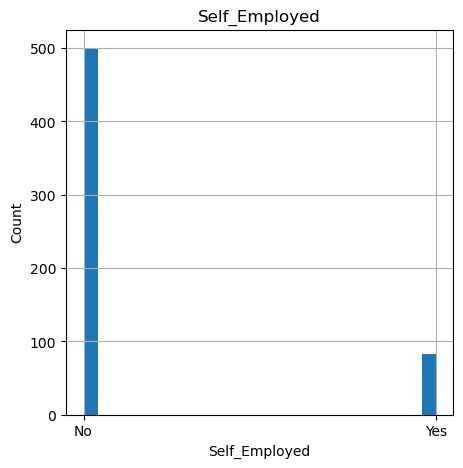

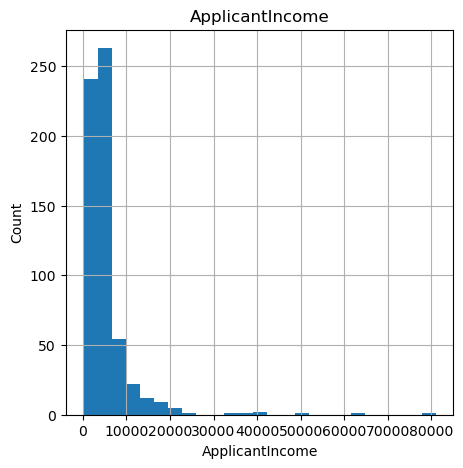

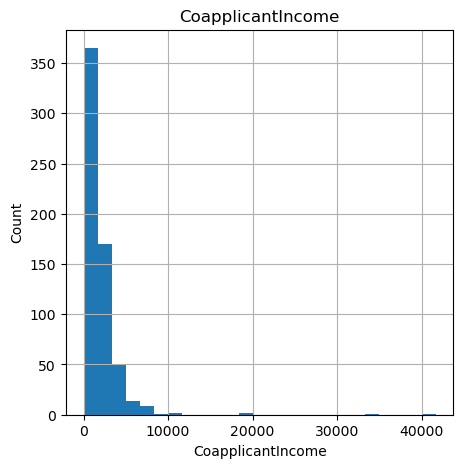

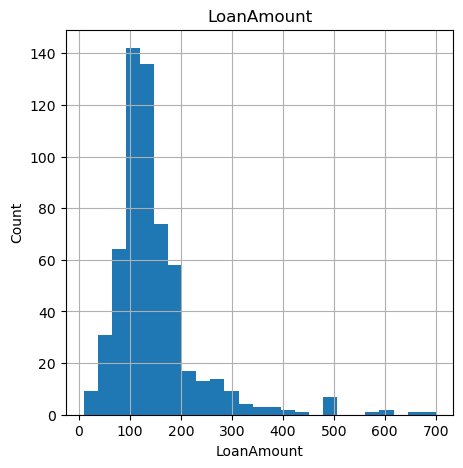

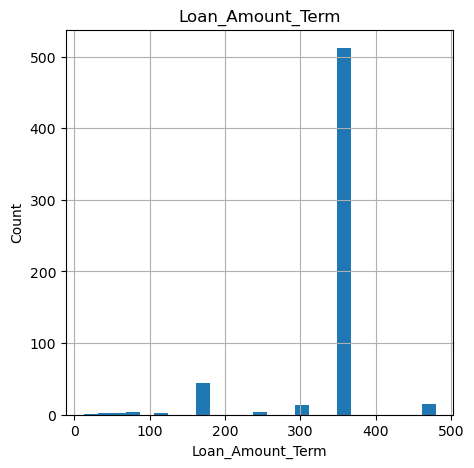

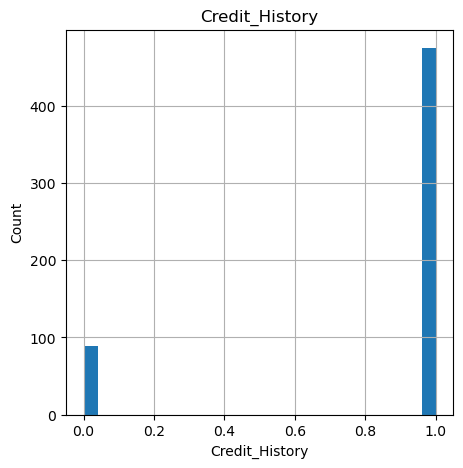

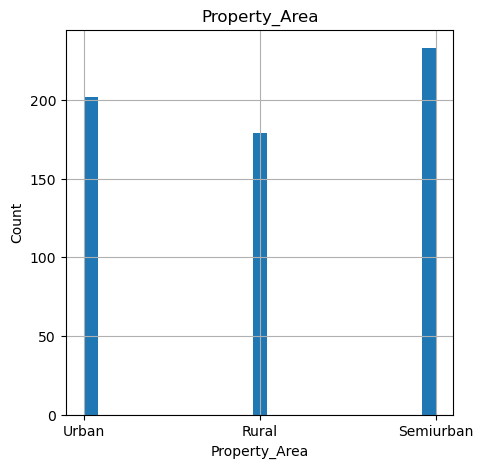

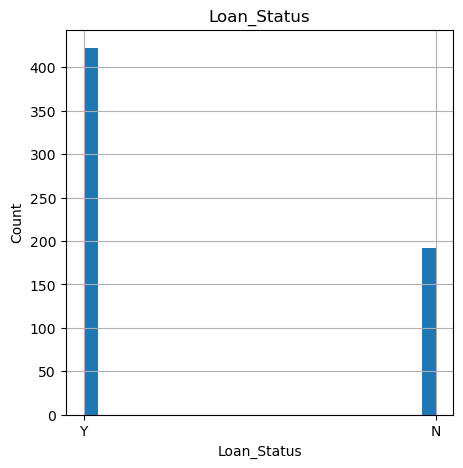

In [50]:
for feature in loan_train:
    data = loan_train.copy()
    data[feature].hist(figsize=(5,5),bins=25)
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.title(feature)
    plt.show()

In [51]:
### Replacing the null values with median as data is skewed

loan_train['LoanAmount'].fillna(loan_train['LoanAmount'].median(), inplace=True) 
loan_test['LoanAmount'].fillna(loan_test['LoanAmount'].median(), inplace=True)

loan_train['Loan_Amount_Term'].fillna(loan_train['Loan_Amount_Term'].median(), inplace=True) 
loan_test['Loan_Amount_Term'].fillna(loan_test['Loan_Amount_Term'].median(), inplace=True)


## below null values of the following features is repaced with mode

loan_train['Gender'].fillna(loan_train['Gender'].mode()[0], inplace=True)
loan_test['Gender'].fillna(loan_test['Gender'].mode()[0], inplace=True)

loan_train['Dependents'].fillna(loan_train['Dependents'].mode()[0], inplace=True)
loan_test['Dependents'].fillna(loan_test['Dependents'].mode()[0], inplace=True)

loan_train['Married'].fillna(loan_train['Married'].mode()[0], inplace=True)
loan_test['Married'].fillna(loan_test['Married'].mode()[0], inplace=True)

loan_train['Credit_History'].fillna(loan_train['Credit_History'].mode()[0], inplace=True)
loan_test['Credit_History'].fillna(loan_test['Credit_History'].mode()[0], inplace=True)

loan_train['Self_Employed'].fillna(loan_train['Self_Employed'].mode()[0], inplace=True) 
loan_test['Self_Employed'].fillna(loan_test['Self_Employed'].mode()[0], inplace=True)

## Data Visualisation

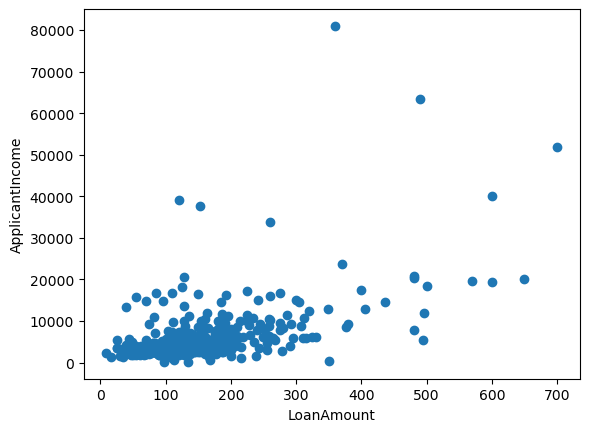

In [52]:
plt.scatter(loan_train['LoanAmount'],loan_train['ApplicantIncome'])
plt.ylabel('ApplicantIncome')
plt.xlabel('LoanAmount')
plt.show()

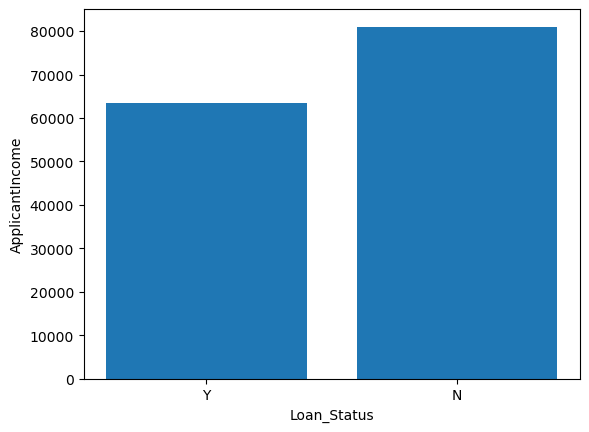

In [53]:
plt.bar(loan_train['Loan_Status'],loan_train['ApplicantIncome'])
plt.ylabel('ApplicantIncome')
plt.xlabel('Loan_Status')
plt.show()

<Axes: xlabel='ApplicantIncome', ylabel='LoanAmount'>

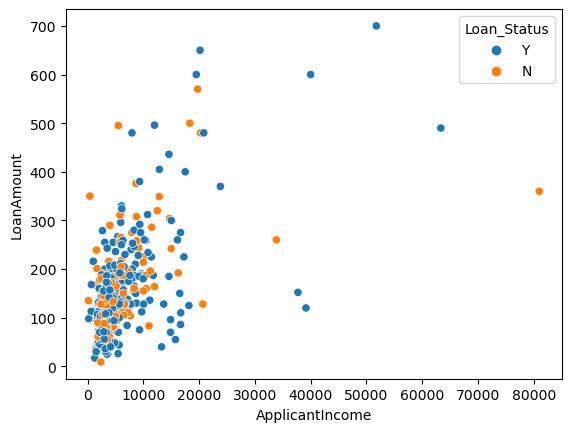

In [54]:
sns.scatterplot(x = 'ApplicantIncome', y = 'LoanAmount', data = loan_train, hue = 'Loan_Status')

## Relation ship Between ApplicantIncome,LoanAmount and Loan_Status

## Pre-Processing(Train data)

In [55]:
## Label Encodeing Categorical Data

from sklearn.preprocessing import LabelEncoder
feature_col = ['Property_Area','Education', 'Dependents','Gender','Married','Self_Employed','Loan_Status']
l_encod = LabelEncoder()
for col in feature_col:
    loan_train[col] = l_encod.fit_transform(loan_train[col])

In [56]:
loan_train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1
610,LP002979,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0,1
611,LP002983,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1
612,LP002984,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,1


In [57]:
loan_train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1
610,LP002979,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0,1
611,LP002983,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1
612,LP002984,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,1


<Axes: >

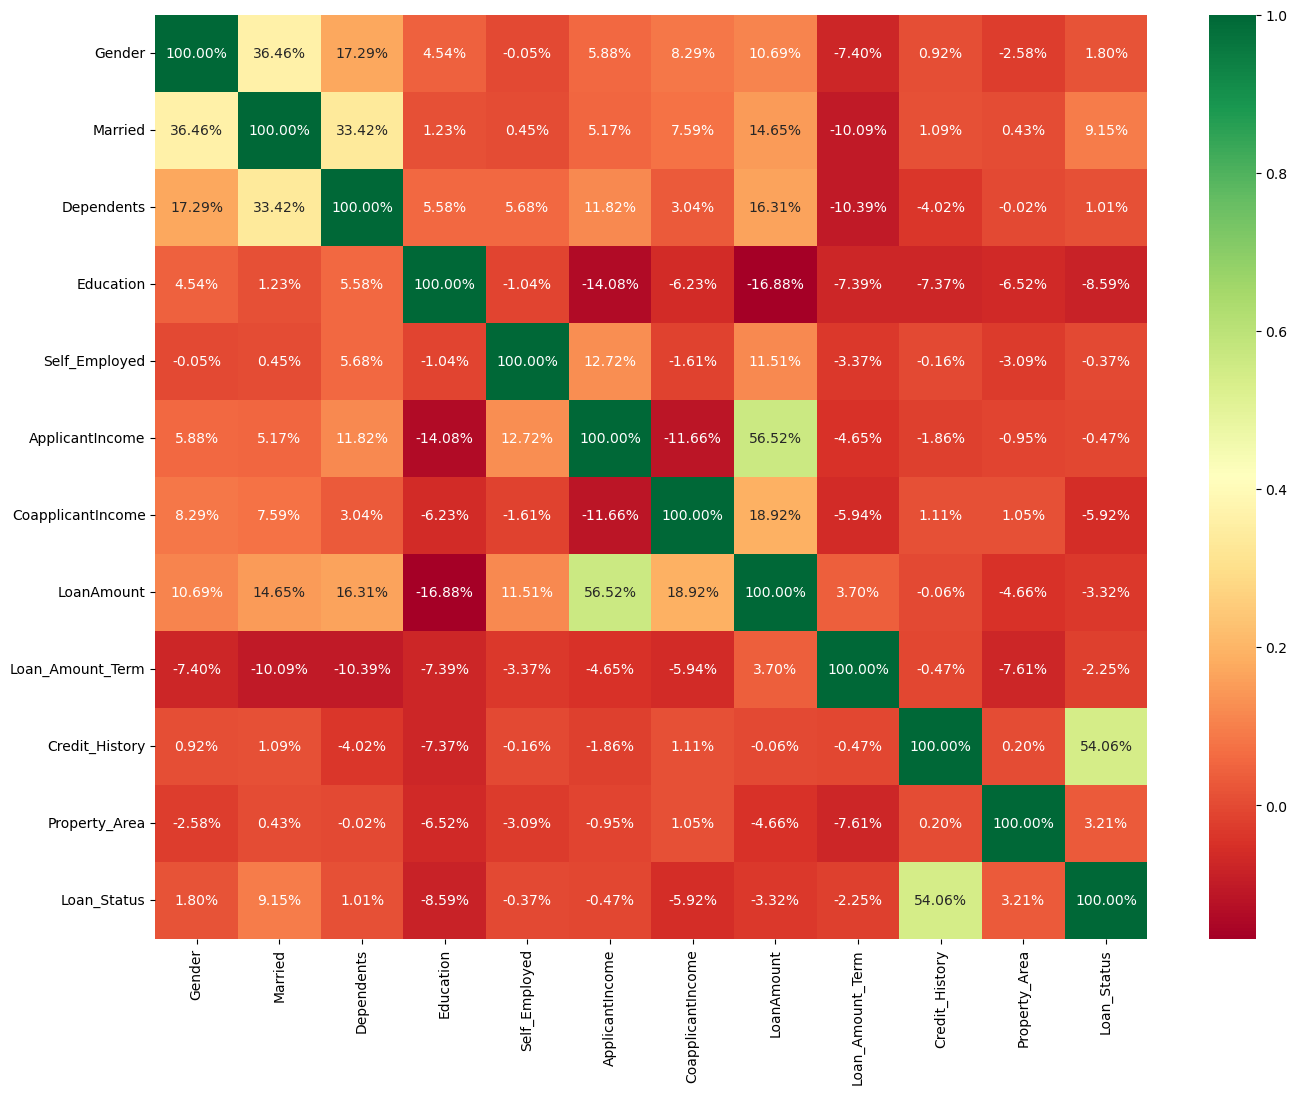

In [58]:
matrix = loan_train.drop(['Loan_ID'],axis=1)
train_corr = matrix.corr()
plt.figure(figsize = (16, 12))
sns.heatmap(train_corr, cmap = 'RdYlGn', annot = True, fmt = '.2%')

## Pre-Processing(Test data)

In [59]:
## Encoding of test data
feature_col = ['Property_Area','Education', 'Dependents','Gender','Married','Self_Employed']
for col in feature_col:
    loan_test[col] = l_encod.fit_transform(loan_test[col])

Model Training

In [60]:
### Creating testing and training to check model accuracy data using train data set

x = loan_train.drop(['Loan_ID','Loan_Status'],axis = 1) ## independent variable
y = loan_train['Loan_Status']

In [61]:
from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size= 0.25,random_state= 0)

In [62]:
from sklearn.metrics import accuracy_score

In [63]:
## Logistic Regression model

from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train, y_train)
pred = model.predict(x_test)
LR=accuracy_score(y_test, pred)

## DecisionTreeClassifier model
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(x_train, y_train)
pred = model.predict(x_test)
DTC=  accuracy_score(y_test, pred)

from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=10).fit(x_train,y_train)
pred = rf_classifier.predict(x_test)
forest = accuracy_score(y_test,pred)



print ("The result were as Follows")
print("\nRandom Forest Classifer",forest)
print("\n\nLogistic Regression ", LR)
print("\n\n Decision Tree Classifier", DTC)

The result were as Follows

Random Forest Classifer 0.7792207792207793


Logistic Regression  0.8376623376623377


 Decision Tree Classifier 0.7207792207792207


E:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


As the accuracy score we can confirm that Logistic Regression has high accuracy, so we create our model with LogisticRegression()

In [64]:
X_train = loan_train.drop(['Loan_ID','Loan_Status'],axis = 1).values
Y_train = loan_train['Loan_Status'].values

X_test = loan_test.drop(['Loan_ID'],axis = 1).values

In [65]:
log_reg = LogisticRegression()
log_reg.fit(X_train, Y_train)
prediction = model.predict(X_test)

E:\Anaconda\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [66]:
prediction

array([0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,

In [68]:
submission = pd.read_csv(r"E:\Data Science\Assignments\Virtual Competition-2\sample submission.csv")

In [69]:
submission['Loan_ID']= loan_test['Loan_ID']
submission['Loan_Status'] = prediction

In [70]:
submission

,Loan_ID,Loan_Status
0,LP001015,0
1,LP001022,1
2,LP001031,1
3,LP001035,1
4,LP001051,0
...,...,...
362,LP002971,1
363,LP002975,1
364,LP002980,1
365,LP002986,1


In [71]:
submission['Loan_Status'].replace(0,'N',inplace=True)
submission['Loan_Status'].replace(1,'Y',inplace=True)

In [72]:
submission

,Loan_ID,Loan_Status
0,LP001015,N
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,N
...,...,...
362,LP002971,Y
363,LP002975,Y
364,LP002980,Y
365,LP002986,Y


In [74]:
pd.DataFrame(submission,columns=['Loan_ID','Loan_Status']).to_csv('E:\Data Science\Assignments\Virtual Competition-2\Test_Loan_Prediction.csv')